In [1]:
import pandas as pd 
import numpy as np

In [2]:
f = open("anonymized-curriculum-access.txt", "r")
print(f.read(1000)) 

2018-01-26 09:55:03 / 1 8 97.105.19.61
2018-01-26 09:56:02 java-ii 1 8 97.105.19.61
2018-01-26 09:56:05 java-ii/object-oriented-programming 1 8 97.105.19.61
2018-01-26 09:56:06 slides/object_oriented_programming 1 8 97.105.19.61
2018-01-26 09:56:24 javascript-i/conditionals 2 22 97.105.19.61
2018-01-26 09:56:41 javascript-i/loops 2 22 97.105.19.61
2018-01-26 09:56:46 javascript-i/conditionals 3 22 97.105.19.61
2018-01-26 09:56:48 javascript-i/functions 3 22 97.105.19.61
2018-01-26 09:56:59 javascript-i/loops 2 22 97.105.19.61
2018-01-26 09:58:26 javascript-i/functions 4 22 97.105.19.61
2018-01-26 09:59:22 mkdocs/search_index.json 5 22 97.105.19.61
2018-01-26 10:00:02 javascript-i/introduction/working-with-data-types-operators-and-variables 6 22 97.105.19.61
2018-01-26 10:00:37 / 6 22 97.105.19.61
2018-01-26 10:00:39 javascript-i 6 22 97.105.19.61
2018-01-26 10:00:44 javascript-i/introduction/working-with-data-types-operators-and-variables 6 22 97.105.19.61
2018-01-26 10:00:49 javascrip

In [3]:
colnames=['date', 'time_stamp', 'page_visited', 'size_mb', 'cohort_id', 'ip']

df_orig = pd.read_csv('anonymized-curriculum-access.csv',         
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
                 usecols=[0, 1, 2, 3, 4, 5, 6, 7,]
)

In [4]:
df_orig

,date,time_stamp,page_visited,size_mb,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86


In [5]:
df = df_orig.set_index('date')

In [6]:
df.size_mb.value_counts()

11     17913
64     16347
53     12329
314     7783
1       7404
       ...  
952        1
212        1
940        1
649        1
879        1
Name: size_mb, Length: 981, dtype: int64

In [7]:
df.cohort_id.value_counts()

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [8]:
df.cohort_id.value_counts().count()

47

In [9]:
df.index.value_counts()

2021-03-19    3104
2021-04-12    2446
2021-03-25    2369
2020-09-08    2304
2021-03-16    2298
              ... 
2018-12-29      32
2018-12-22      30
2018-12-30      21
2019-07-04      16
2018-12-23      10
Name: date, Length: 1182, dtype: int64

In [10]:
me = df[df.ip == '96.8.248.136']
me.head()

,time_stamp,page_visited,size_mb,cohort_id,ip
date,,,,,
2021-04-19,08:18:29,timeseries/explore,846,133.0,96.8.248.136
2021-04-19,08:18:34,timeseries/modeling-lesson1,846,133.0,96.8.248.136
2021-04-21,11:48:01,/,846,133.0,96.8.248.136
2021-04-21,11:48:18,anomaly-detection/overview,846,133.0,96.8.248.136
2021-04-21,11:48:18,anomaly-detection/AnomalyDetectionCartoon.jpeg,846,133.0,96.8.248.136


In [11]:
colnames=['date', 'time_stamp', 'page_visited', 'user_id', 'cohort_id', 'ip']

df_orig = pd.read_csv('anonymized-curriculum-access.csv',         
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
                 usecols=[0, 1, 2, 3, 4, 5, 6, 7]
)

In [12]:
df_orig.head()

,date,time_stamp,page_visited,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [13]:
Matt = df_orig[df_orig.ip == '24.160.7.8']
Matt.head()

,date,time_stamp,page_visited,user_id,cohort_id,ip
755228,2020-12-08,10:51:36,/,844,133.0,24.160.7.8
755279,2020-12-08,10:58:43,classification/tidy-data,844,133.0,24.160.7.8
755288,2020-12-08,10:59:24,sql/mysql-overview,844,133.0,24.160.7.8
755302,2020-12-08,11:00:36,python/overview,844,133.0,24.160.7.8
755317,2020-12-08,11:01:42,python/introduction-to-python,844,133.0,24.160.7.8


In [14]:
Me = df_orig[df_orig.ip == '96.8.248.136']
Me.head()

,date,time_stamp,page_visited,user_id,cohort_id,ip
895095,2021-04-19,08:18:29,timeseries/explore,846,133.0,96.8.248.136
895096,2021-04-19,08:18:34,timeseries/modeling-lesson1,846,133.0,96.8.248.136
899790,2021-04-21,11:48:01,/,846,133.0,96.8.248.136
899791,2021-04-21,11:48:18,anomaly-detection/overview,846,133.0,96.8.248.136
899792,2021-04-21,11:48:18,anomaly-detection/AnomalyDetectionCartoon.jpeg,846,133.0,96.8.248.136


In [15]:
# Easley cohort is 133

In [16]:
# Idea 1, is to look at specific page_visited and link them to the cohort ID and use_id

In [17]:
instructor = df_orig[df_orig.cohort_id == 22]
instructor.head()

,date,time_stamp,page_visited,user_id,cohort_id,ip
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
5,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61
6,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61
7,2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61
8,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61


In [18]:
Me = df_orig[df_orig.ip == '']
Me.head()

,date,time_stamp,page_visited,user_id,cohort_id,ip


In [19]:
instructors = df_orig[df_orig.page_visited == 'javascript-i']
instructors

,date,time_stamp,page_visited,user_id,cohort_id,ip
13,2018-01-26,10:00:39,javascript-i,6,22.0,97.105.19.61
31,2018-01-26,10:14:51,javascript-i,11,1.0,97.105.19.61
34,2018-01-26,10:15:23,javascript-i,6,22.0,97.105.19.61
41,2018-01-26,10:33:18,javascript-i,12,22.0,97.105.19.61
68,2018-01-26,10:50:01,javascript-i,3,22.0,97.105.19.61
...,...,...,...,...,...,...
899977,2021-04-21,13:32:28,javascript-i,642,57.0,173.174.190.7
899979,2021-04-21,13:33:09,javascript-i,928,138.0,66.68.101.2
900036,2021-04-21,14:36:41,javascript-i,876,135.0,98.6.122.83
900117,2021-04-21,15:32:41,javascript-i,875,135.0,24.242.150.231


In [20]:
instructors.user_id.value_counts()

64     388
53     380
428    278
344    272
495    256
      ... 
243      1
55       1
147      1
151      1
97       1
Name: user_id, Length: 725, dtype: int64

In [21]:
instructors.nunique()

date             1141
time_stamp      15425
page_visited        1
user_id           725
cohort_id          40
ip               1302
dtype: int64

In [22]:
instructors.cohort_id.value_counts()

28.0     1817
33.0     1003
62.0      926
58.0      910
135.0     907
29.0      897
51.0      896
24.0      884
53.0      785
57.0      760
26.0      722
32.0      717
134.0     676
56.0      669
132.0     631
22.0      615
25.0      560
23.0      526
31.0      516
52.0      506
27.0      452
61.0      374
1.0       294
138.0     272
14.0      233
21.0      202
139.0     136
17.0      128
18.0       69
8.0        36
16.0       23
13.0       17
7.0        11
34.0       10
11.0        7
15.0        6
19.0        6
6.0         2
2.0         1
12.0        1
Name: cohort_id, dtype: int64

Ideas:
Can you label students who are viewing both the web dev and data science curriculum?
Can you label students by the program they are in?
Can you label users by student vs. staff?
What are Zach, Maggie, Faith, and Ryan's ids?

In [23]:
df_orig

,date,time_stamp,page_visited,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86


In [24]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Try with SQL

### Ideas:
- Can you label students who are viewing both the web dev and data science curriculum?
- Can you label students by the program they are in?
- Can you label users by student vs. staff?
- What are Zach, Maggie, Faith, and Ryan's ids?


##### Notes
- 1:Full-Stack PHP Program
- 2:Full-Stack Java Program
- 3:Data Science Program
- 4:Front-End Program

In [25]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [26]:
def get_data():
    '''
    Grab our data from path and read as dataframe
    '''
    
    df = pd.read_sql('''
                        Select * 
                        FROM logs
                        Left join cohorts on cohorts.id = logs.cohort_id;
                        ''', get_connection('curriculum_logs'))

    
    return df

In [97]:
df = get_data()
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


In [98]:
df = df.drop(columns = ['deleted_at', 'slack'])

In [99]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   start_date  847330 non-null  object 
 9   end_date    847330 non-null  object 
 10  created_at  847330 non-null  object 
 11  updated_at  847330 non-null  object 
 12  program_id  847330 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 89.3+ MB


In [101]:
df['datetime'] = df['date']+ " " + df['time']

In [102]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,datetime
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,2018-01-26 09:56:24


In [103]:
df.datetime = pd.to_datetime(df.datetime)

In [104]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,datetime
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,2018-01-26 09:56:24


In [106]:
df.drop(columns = ['date', 'time'])

,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,datetime
0,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,2018-01-26 09:56:24
...,...,...,...,...,...,...,...,...,...,...,...,...
900218,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:41:51
900219,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:42:02
900220,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:42:09
900221,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:44:37


In [111]:
df.set_index(df.datetime)

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,datetime
datetime,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:55:03
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:02
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:05
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:06
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,2018-01-26 09:56:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:41:51
2021-04-21 16:42:02,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:42:02
2021-04-21 16:42:09,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:42:09


In [112]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,datetime
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,2018-01-26 09:56:24


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        900223 non-null  object        
 1   time        900223 non-null  object        
 2   path        900222 non-null  object        
 3   user_id     900223 non-null  int64         
 4   cohort_id   847330 non-null  float64       
 5   ip          900223 non-null  object        
 6   id          847330 non-null  float64       
 7   name        847330 non-null  object        
 8   start_date  847330 non-null  object        
 9   end_date    847330 non-null  object        
 10  created_at  847330 non-null  object        
 11  updated_at  847330 non-null  object        
 12  program_id  847330 non-null  float64       
 13  datetime    900223 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 96.2+ MB


In [114]:
Me = df[df.ip == '96.8.248.136']
Me.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,datetime
895095,2021-04-19,08:18:29,timeseries/explore,846,133.0,96.8.248.136,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,2021-04-19 08:18:29
895096,2021-04-19,08:18:34,timeseries/modeling-lesson1,846,133.0,96.8.248.136,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,2021-04-19 08:18:34
899790,2021-04-21,11:48:01,/,846,133.0,96.8.248.136,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,2021-04-21 11:48:01
899791,2021-04-21,11:48:18,anomaly-detection/overview,846,133.0,96.8.248.136,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,2021-04-21 11:48:18
899792,2021-04-21,11:48:18,anomaly-detection/AnomalyDetectionCartoon.jpeg,846,133.0,96.8.248.136,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,2021-04-21 11:48:18


<AxesSubplot:>

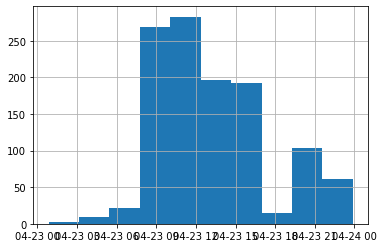

In [116]:
Matt.time.hist()

<AxesSubplot:>

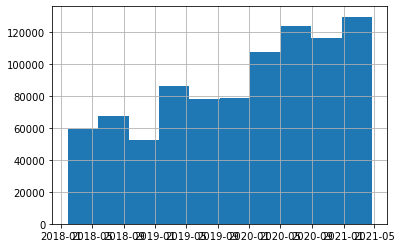

In [120]:
df.datetime.hist()

In [121]:
Matt = df[df.ip == '24.160.7.8']
Matt.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,datetime
755228,2020-12-08,10:51:36,/,844,133.0,24.160.7.8,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,2020-12-08 10:51:36
755279,2020-12-08,10:58:43,classification/tidy-data,844,133.0,24.160.7.8,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,2020-12-08 10:58:43
755288,2020-12-08,10:59:24,sql/mysql-overview,844,133.0,24.160.7.8,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,2020-12-08 10:59:24
755302,2020-12-08,11:00:36,python/overview,844,133.0,24.160.7.8,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,2020-12-08 11:00:36
755317,2020-12-08,11:01:42,python/introduction-to-python,844,133.0,24.160.7.8,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,2020-12-08 11:01:42


<AxesSubplot:>

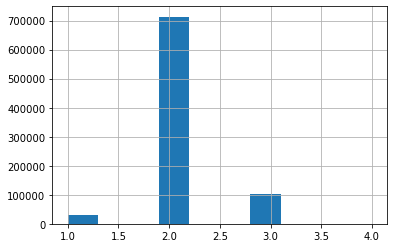

In [122]:
df.program_id.hist()